In [313]:
import matplotlib.pyplot as plt  # 绘图库
import numpy as np
import scipy.optimize as op
import tensorflow as tf

In [314]:
data = np.loadtxt('ex2data1.txt')
train_X = data[:, [0, 1]]
train_X = train_X.reshape((-1, 2))

train_Y = data[:, 2]
train_Y = train_Y.reshape((-1,1))

In [315]:
def plotData(X, y):
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    #print(pos)

    plt.scatter(X[pos, 0], X[pos, 1], color='b', alpha=0.6, label='Admitted')  # 绘制散点图，透明度为0.6
    plt.scatter(X[neg, 0], X[neg, 1], color='y', alpha=0.6, label='Not admitted')  # 绘制散点图，透明度为0.6

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

    plt.legend(loc='upper right')
    
    plt.show()

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


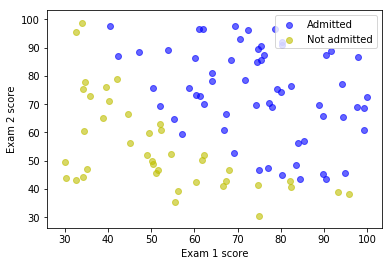

In [316]:
## ==================== Part 1: Plotting ====================
print("Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.")

plotData(train_X, train_Y)

In [317]:
m = train_X.shape[0]
train_X = np.c_[np.ones([m, 1]), train_X]    # Add a column of ones to x

# tf Graph Input
X = tf.placeholder(tf.float32, shape=(m, 3))
Y = tf.placeholder(tf.float32, shape=(m, 1))

# Set model weights
theta = tf.Variable(tf.zeros([3, 1]), name="theta") 

In [318]:
# Parameters
learning_rate = 0.002
training_epochs = 600000
display_step = 5000

In [319]:
hypothesis = tf.sigmoid(tf.matmul(X, theta))
term1 = tf.reduce_sum(tf.multiply(Y, tf.log(hypothesis)))
term2 = tf.reduce_sum(tf.multiply(1 - Y, tf.log(1-hypothesis)))
cost = (term1 + term2) / (-m)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [320]:
# 开始训练
with tf.Session() as sess:

    # 执行初始化操作
    sess.run(tf.global_variables_initializer())

    # 拟合模型数据
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        # 每50次迭代后在控制台输出模型当前训练的loss以及权重大小
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", (epoch+1), "cost=", c, "theta=", sess.run(theta))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "theta=", sess.run(theta))


Epoch: 5000 cost= 0.61398965 theta= [[-0.73712724]
 [ 0.02432286]
 [ 0.00614351]]
Epoch: 10000 cost= 0.54854816 theta= [[-1.4346324 ]
 [ 0.02781158]
 [ 0.00877241]]
Epoch: 15000 cost= 0.5264102 theta= [[-2.0929494 ]
 [ 0.03284827]
 [ 0.01672234]]
Epoch: 20000 cost= 2.0071826 theta= [[-2.7226899 ]
 [ 0.08040896]
 [ 0.06486524]]
Epoch: 25000 cost= 0.46415922 theta= [[-3.3093116 ]
 [ 0.04134674]
 [ 0.02609214]]
Epoch: 30000 cost= 0.5581837 theta= [[-3.8571367 ]
 [ 0.05014625]
 [ 0.0389614 ]]
Epoch: 35000 cost= 0.5709292 theta= [[-4.364149  ]
 [ 0.03564503]
 [ 0.0215355 ]]
Epoch: 40000 cost= 0.4759763 theta= [[-4.8616614]
 [ 0.0416517]
 [ 0.0279669]]
Epoch: 45000 cost= 0.697127 theta= [[-5.3518753 ]
 [ 0.03864399]
 [ 0.02547789]]
Epoch: 50000 cost= 0.6454138 theta= [[-5.8175874 ]
 [ 0.04273687]
 [ 0.02977075]]
Epoch: 55000 cost= 0.60203224 theta= [[-6.2661004 ]
 [ 0.04681124]
 [ 0.03366903]]
Epoch: 60000 cost= 0.5129521 theta= [[-6.6990614 ]
 [ 0.0521499 ]
 [ 0.03877947]]
Epoch: 65000 cost

Epoch: 485000 cost= 0.22219898 theta= [[-15.87121  ]
 [  0.1320519]
 [  0.1263189]]
Epoch: 490000 cost= 0.22196464 theta= [[-15.918894  ]
 [  0.13243183]
 [  0.12670365]]
Epoch: 495000 cost= 0.22173236 theta= [[-15.966578  ]
 [  0.13281175]
 [  0.12708841]]
Epoch: 500000 cost= 0.22150214 theta= [[-16.014261  ]
 [  0.1331917 ]
 [  0.12747319]]
Epoch: 505000 cost= 0.22127396 theta= [[-16.061945  ]
 [  0.13357165]
 [  0.12785801]]
Epoch: 510000 cost= 0.22104777 theta= [[-16.109629  ]
 [  0.13395163]
 [  0.12824284]]
Epoch: 515000 cost= 0.22082359 theta= [[-16.157312  ]
 [  0.13433161]
 [  0.1286277 ]]
Epoch: 520000 cost= 0.2206014 theta= [[-16.204996  ]
 [  0.13471162]
 [  0.12901258]]
Epoch: 525000 cost= 0.22038116 theta= [[-16.25268   ]
 [  0.13509162]
 [  0.12939747]]
Epoch: 530000 cost= 0.22016294 theta= [[-16.300364  ]
 [  0.13547164]
 [  0.1297824 ]]
Epoch: 535000 cost= 0.21994662 theta= [[-16.348047  ]
 [  0.1358517 ]
 [  0.13016734]]
Epoch: 540000 cost= 0.21973224 theta= [[-16.395